# Ερώτημα 1









##1.1

\begin{align*}\\
f(x) = (x - a)^T A(x-a) \\
Ισχυει \ \
∇f = [\frac{df(x)}{dx_1} ... \frac{df(x)}{dx_d}]^T &\Rightarrow \\
\frac{df(x)}{dx_d}=\frac{d[(x - a)^T A(x-a)]}{dx_d} = 2A(x − a) ⇒\\  ∇f  = 2A(x − a)\ \  from \ Cookbook, \ Property:85
\end{align*}

##1.2


\
$$
\begin{align*}
Εχουμε,\min_{X} \|A - XB\|_F^2 \Rightarrow \\= \text{tr}(AA^T - AXB^T - XBA^T + XB(XB)^T)  \\= \text{tr}(AA^T)-\text{tr}(AXB^T) - \text{tr}(XBA^T) + \text{tr}(XBB^TX^T) \Rightarrow\\
\frac{df(x)}{dx} = 0 - AB^T - (AB^T)^T + XBB^T = 2 * (XBB^T - AB^T) \\
\frac{df(x)}{dx} = 0 \Rightarrow 2 * (XBB^T - AB^T) = 0 \Rightarrow XBB^T = AB^T \Rightarrow \\X = \begin{cases}
AB^T (BB^T)^{-1},  \text{if } BB^T \text{ is invertible} \\
AB^\dagger,  \text{otherwise}
\end{cases}
\end{align*}
$$

#Ερώτημα 2

##2.1

In [80]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import os

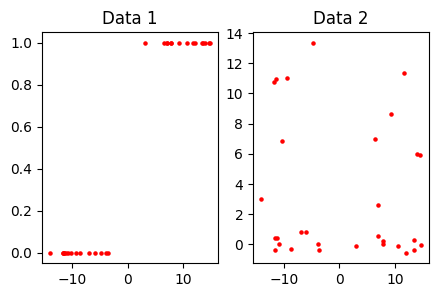

In [81]:
#import data
data1 = np.array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

data2 = np.array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+00,
         1.33554857e+01,  8.29901089e-01,  6.98676486e+00,
         1.09374219e+01,  1.10267454e+01, -3.73579147e-01,
         8.46227301e-01,  2.54038774e-02,  1.07569223e+01]])


#represent data
data1_input = data1[0]
data1_output = data1[1]

data2_input = data2[0]
data2_output = data2[1]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].scatter(data1_input, data1_output, s = 5, color = 'red')
axes[1].scatter(data1_input, data2_output, s = 5, color = 'red')

axes[0].set_title('Data 1')
axes[1].set_title('Data 2')

plt.show()

In [82]:
#FUNCTIONS

#F1
def sigmoid(x):
    return 1 / (1 + np.exp(x))

def f1(w, x):
  f1 = sigmoid(-(w[0] + w[1] * x))
  return f1


#F2
def sigma(x):

    s = []
    for elem in x:
      if elem > 0:
        s.append(elem)
      else:
        s.append(0)
    return np.array(s)

def f2(w, x):
  return w[0] + w[1] * sigma(w[2] + w[3] * x)


#COST FUNCTIONS

def L1(w, x, y):

    n = len(y)
    w0 = w[0]
    w1 = w[1]

    f1 = sigmoid(-(w0 + w1 * x))
    cost = -(1/n) * np.sum(y * np.log2(f1) + (1 - y) * np.log2(1 - f1))

    return cost


def L2(w, x, y):
    n = len(y)
    predictions = w[0] + w[1] * sigma(w[2] + w[3] * x)
    return (1 / n) * np.sum((y - predictions) ** 2)


#DERIVATIVES

def D_sigmoid(x):

    s = sigmoid(x)
    return s * (1 - s)


def D_sigma(x):

    s = []
    for elem in x:
      if elem > 0:
        s.append(1)
      else:
        s.append(0)
    return np.array(s)


def DL1_w0(x, y, w):

    n = len(y)
    f1 = sigmoid(-(w[0] + w[1] * x))

    return (1/n) * np.sum((f1 - y) * D_sigmoid(w[0] + w[1] * x))


def DL1_w1(x, y, w):

    n = len(y)
    f1 = sigmoid(-(w[0] + w[1] * x))

    return (1/n) * np.sum((f1 - y) * x * D_sigmoid(w[0] + w[1] * x))


def DL2_w0(x, y, w):

    n = len(y)
    f2 = w[0] + w[1] * sigma(w[2] + w[3] * x)

    return (-2/n) * np.sum((y - f2))


def DL2_w1(x, y, w):

    n = len(y)
    f2 = w[0] + w[1] * sigma(w[2] + w[3] * x)

    return (-2/n) * np.sum((y - f2) * D_sigma(w[2] + w[3] * x))


def DL2_w2(x, y, w):

    n = len(y)
    f2 = w[0] + w[1] * sigma(w[2] + w[3] * x)

    return (-2/n) * np.sum((y - f2) * w[1] * D_sigma(w[2] + w[3] * x))


def DL2_w3(x, y, w):

    n = len(y)
    f2 = w[0] + w[1] * sigma(w[2] + w[3] * x)

    return (-2/n) * np.sum((y - f2) * w[1] * D_sigma(w[2] + w[3] * x) * x)



In [83]:
#GRADIENT DESCENT

def gradient_descent(x, y,f, w, l, dlwList, T , learning_rate = 0.001):

    costList = []
    y_predList = []

    wnew = []
    for i in range(len(w)):
      wnew.append(w[i])

    wder = []
    for i in range(len(w)):
      wder.append(i)

    w0 = w[0]
    w1 = w[1]

    dlw1 = dlwList[1]
    dlw0 = dlwList[0]

    for i in range(T):

        n  = float(len(x))
        ypred = f(np.array(wnew), x)
        y_predList.append(ypred)

        for j in range(len(wnew)):

          w_new = wnew[j]

          dlwFunc = dlwList[j]

          w_der = dlwFunc(x, y, wnew)

          w_new = w_new - (learning_rate * w_der)

          wnew[j] = w_new

        cost = l(np.array(wnew), x, y)
        costList.append(cost)

    return wnew, costList, y_predList


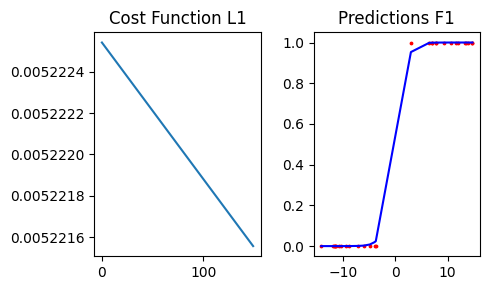

In [84]:
#orismos parametrwn
w_f1 = np.array([0.,1.])
w_f2 = np.array([0.5, 1, 2.2 , 3.4])
learning_rate = math.pow(10, -3)
T = 150

x1 = data1[0]
y1 = data1[1]

#list of DL1 functions
dL1_list = []
dL1_list.append(DL1_w0)
dL1_list.append(DL1_w1)

#call for F1-L1
weight, cost, y_pred = gradient_descent(x1, y1, f1, w_f1, L1, dL1_list, T , learning_rate = 0.001)

iterations = [i for  i in range(T)]


estimated_bias = weight[0]
estimated_weight = weight


sorted_ind = np.argsort(x1)
x_sort = x1[sorted_ind]

final_pred =np.array(y_pred[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, cost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x1, y1, s = 3,marker='o', color='red')

axes[0].set_title('Cost Function L1')
axes[1].set_title('Predictions F1')

fig.tight_layout()


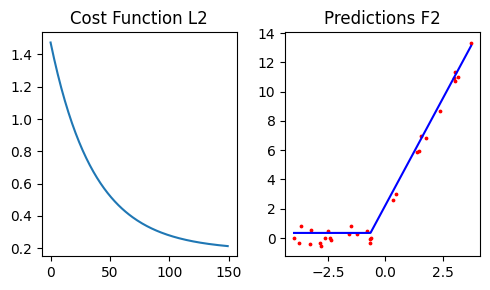

In [85]:
x2 = data2[0]
y2 = data2[1]

dL2_list = []
dL2_list.append(DL2_w0)
dL2_list.append(DL2_w1)
dL2_list.append(DL2_w2)
dL2_list.append(DL2_w3)

weight, cost, y_pred = gradient_descent(x2, y2, f2, w_f2, L2, dL2_list, T , learning_rate = 0.001)

iterations = [i for  i in range(T)]

estimated_bias = weight[0]
estimated_weight = weight

sorted_ind = np.argsort(x2)
x_sort = x2[sorted_ind]

final_pred =np.array(y_pred[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, cost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x2, y2, s = 3,marker='o', color='red')

axes[0].set_title('Cost Function L2')
axes[1].set_title('Predictions F2')

fig.tight_layout()

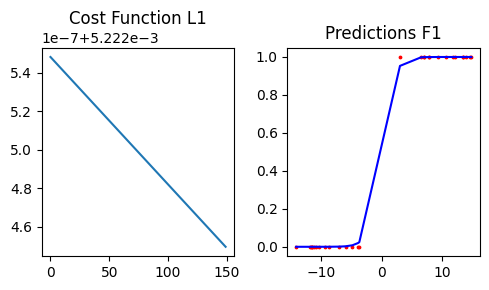

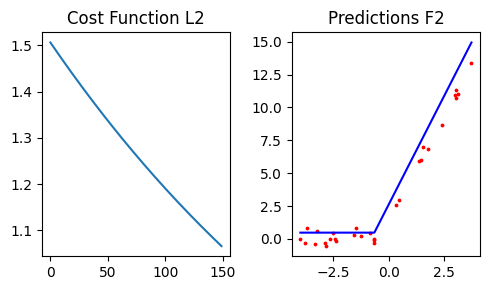

In [86]:
#call for F1-L1 FOR LR = 0.0001
weight, cost, y_pred = gradient_descent(x1, y1, f1, w_f1, L1, dL1_list, T , learning_rate = 0.0001)

iterations = [i for  i in range(T)]

estimated_bias = weight[0]
estimated_weight = weight

sorted_ind = np.argsort(x1)
x_sort = x1[sorted_ind]

final_pred =np.array(y_pred[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, cost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x1, y1, s = 3,marker='o', color='red')

axes[0].set_title('Cost Function L1')
axes[1].set_title('Predictions F1')

fig.tight_layout()



weight, cost, y_pred = gradient_descent(x2, y2, f2, w_f2, L2, dL2_list, T , learning_rate = 0.0001)

iterations = [i for  i in range(T)]

estimated_bias = weight[0]
estimated_weight = weight

sorted_ind = np.argsort(x2)
x_sort = x2[sorted_ind]

final_pred =np.array(y_pred[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, cost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x2, y2, s = 3,marker='o', color='red')

axes[0].set_title('Cost Function L2')
axes[1].set_title('Predictions F2')

fig.tight_layout()

#Σχολιασμος ευρηματων και παρατηρησεις για μειωση learning rate σε 10^(-4)

*   Σχολιασμος: \\
    1. Συναρτήσεις Κόστους \\
    Όπως βλεπουμε απο τις γραφικες  παραστασεις στην πρωτη περιπτωση το κοστος μειωνεται γραμμικα, ενω στην δευτερη εκθετικα , με τις τιμες του κοστους να ειναι αρκετα χαμηλες.Και στις δυο περιπτωσεις βλεπουμε οτι οσο αυξανονται οι επαναληψεις μειωνεται το κοστος.Ετσι βλεπουμε την αποδοση του μοντελου να προσαρμοζεται καλα στα δεδομενα. \\
    
    2.Προβλεψεις: \\
    Παρατηρωντας τις γραφικες οι οποιες απεικονιζουν τα πραγματικα δεδομενα με κοκκινες κουκιδες και με μπλε καμπυλη την προσεγγιση αυτων των δεδομενων μεσω του αλγοριθμου , βλεπουμε οτι το μοντελο εχει προβλεψει σωστα την συμπεριφορα των δεδομενων

* Αλλαγη learning rate : \\
Βλεπουμε φανερα οτι με την μειωση αυτη το κοστος αυξανεται αρκεται και οπως μπορει να γινει αμεσα και πιο ευδιακριτα φανερο απο την γραφικη για τα predictions της F2 επηρεαζεται και η αποδοση του αλγοριθμου στην προσαρμογη στα δεδομενα, καθως βλεπουμε οτι αποκλεινει οπως φαινεται παραπανω.Αρα η επιλογη αυτη δεν βοηθα καπου στην βελτιωση του μοντελου μας.






##2.2

**1**

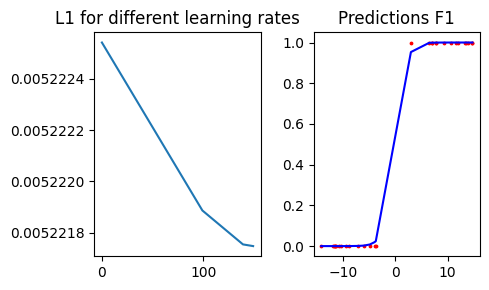

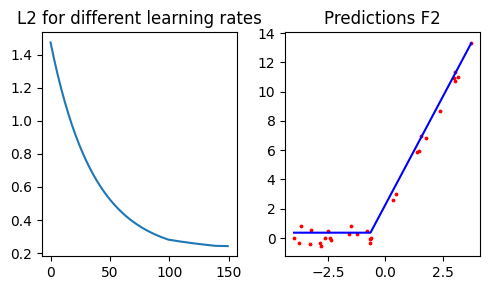

In [87]:
#FOR F1
T = 100
learning_rate = 0.001
weight100, cost100, y_pred100 = gradient_descent(x1, y1, f1, w_f1, L1, dL1_list, T , learning_rate)

T = 40
learning_rate = 5 * 0.0001
weight40, cost40, y_pred40 = gradient_descent(x1, y1, f1, weight100, L1, dL1_list, T , learning_rate)

T = 10
learning_rate = 0.0001
weight10, cost10, y_pred10 = gradient_descent(x1, y1, f1, weight40, L1, dL1_list, T , learning_rate)


finalcost = cost100 + cost40 + cost10

iterations = [i for i in range(0,150)]
sorted_ind = np.argsort(x1)
x_sort = x1[sorted_ind]

final_pred =np.array(y_pred10[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, finalcost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x1, y1, s = 3,marker='o', color='red')

axes[0].set_title('L1 for different learning rates')
axes[1].set_title('Predictions F1')

fig.tight_layout()


T = 100
learning_rate = 0.001
weight100, cost100, y_pred100 = gradient_descent(x2, y2, f2, w_f2, L2, dL2_list, T , learning_rate)

T = 40
learning_rate = 5 * 0.0001
weight40, cost40, y_pred40 = gradient_descent(x2, y2, f2, weight100, L2, dL2_list, T , learning_rate)

T = 10
learning_rate = 0.0001
weight10, cost10, y_pred10 = gradient_descent(x2, y2, f2, weight40, L2, dL2_list, T , learning_rate)

finalcost = cost100 + cost40 + cost10

iterations = [i for i in range(0,150)]

sorted_ind = np.argsort(x2)
x_sort = x2[sorted_ind]

final_pred =np.array(y_pred10[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, finalcost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x2, y2, s = 3,marker='o', color='red')

axes[0].set_title('L2 for different learning rates')
axes[1].set_title('Predictions F2')

fig.tight_layout()

**2**

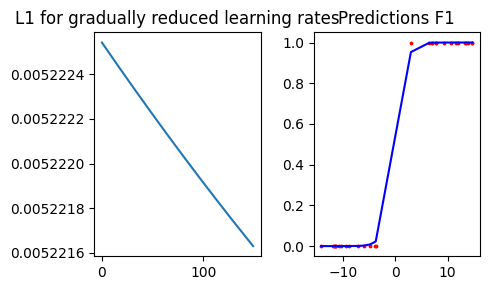

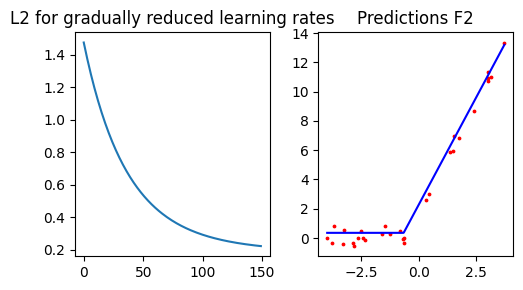

In [88]:
finalcost = []
weight = []
weight.append(w_f1[0])
weight.append(w_f1[1])
learning_rate = 0.001
for i in range(150):
  weight, cost, y_pred = gradient_descent(x1, y1, f1, weight, L1, dL1_list, 1 , learning_rate)
  finalcost = finalcost + cost
  learning_rate = learning_rate - 0.000001

sorted_ind = np.argsort(x1)
x_sort = x1[sorted_ind]

final_pred =np.array(y_pred[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, finalcost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x1, y1, s = 3,marker='o', color='red')

axes[0].set_title('L1 for gradually reduced learning rates')
axes[1].set_title('Predictions F1')

fig.tight_layout()


finalcost = []
weight = []
weight.append(w_f2[0])
weight.append(w_f2[1])
weight.append(w_f2[2])
weight.append(w_f2[3])

learning_rate = 0.001
for i in range(150):
  weight, cost, y_pred = gradient_descent(x2, y2, f2, weight, L2, dL2_list, 1 , learning_rate)
  finalcost = finalcost + cost
  learning_rate = learning_rate - 0.000001

sorted_ind = np.argsort(x2)
x_sort = x2[sorted_ind]

final_pred =np.array(y_pred[-1])
sorted_pred = final_pred[sorted_ind]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(iterations, finalcost)
axes[1].plot(x_sort, sorted_pred, color='blue',markerfacecolor='red',
          markersize=10)
axes[1].scatter(x2, y2, s = 3,marker='o', color='red')

axes[0].set_title('L2 for gradually reduced learning rates')
axes[1].set_title('Predictions F2')

fig.tight_layout()


#Συγκρίση αποτελεσματων τόσο μεταξύ τους όσο και με αυτά του προηγούμενου υποερωτήματος

Παρατηρουμε οτι στην πρωτη περιπτωση:\
*Συγκεκριμενα για f1:Το κοστος για 100 επαναληψεις και learning rate = 10 ^ (-3) μειωνεται γραμμικα και στην πορεια για τις επομενες 40 και για learning rate = 5 * 10^(-4) μειωνεται με πιο αργο ρυθμο οσπου για τις επομενες 10 τεινει να σταθεροποιειται , με παρομοιο τροπο και για την L2 απλα με εκθετικο τροπο στην αρχη και μετα μειωνεται οσπου στο τελος σταθεροποιειατι , πραγμα

1.   Στοιχείο λίστας
2.   Στοιχείο λίστας

που μας δειχνει ενα βελτιστο σημειο

Για την δευτερη περιπτωση οπου υπαρχει σταδιακη μειωση δεν υπαρχουν πολλες μεταβολες σε συγκριση με το προηγουμενο ερωτημα.

Σε συγκριση με το προηγουμενο ερωτημα βλεπουμε οτι οι μεταβολες του ρυθμου μαθησης επηρεαζουν την ταχυτητα με την οποια μειωνεται η συναρτηση κοστους.Παρ' ολα αυτα σε ολες τις περιπτωσεις ο αλγοριθμος παραμενει αποδοτικος ως προς τις προβλεψεις και την προσαρμογη του στα δεδομενα


#Ερώτημα 3

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import os
import re
import math
import random
import numpy as np
from PIL import Image
from scipy.linalg import svd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier

##3.1

In [91]:
def loadImages(path, set_number):

    set_dict = {
        "1": [f"person*_{i:02d}.png" for i in range(1, 8)],
        "2": [f"person*_{i:02d}.png" for i in range(8, 20)],
        "3": [f"person*_{i:02d}.png" for i in range(20, 32)],
        "4": [f"person*_{i:02d}.png" for i in range(32, 46)],
        "5": [f"person*_{i:02d}.png" for i in range(46, 65)]
    }
    SetNum = set_number.replace('Set_', '')

    pathList = []
    for pic in set_dict[SetNum]:
        pathList.append(path + pic)

    final_path = []
    labels = []
    for i in range(1, 10):
        temp = [person.replace('*', '0' + str(i)) for person in pathList]
        final_path.append(temp)

    temp = [person.replace('*', str(10)) for person in pathList]
    final_path.append(temp)

    i = 1
    pixels = []
    for path in final_path:
        for filePath in path:
            pic = Image.open(filePath)
            pixVal = np.array(pic).flatten()

            mu = np.mean(pixVal)
            std_dev = np.std(pixVal)
            pixVal = (pixVal - mu) / std_dev

            pixels.append(pixVal)
            labels.append(i)
        i += 1

    pixels_array = np.array(pixels)
    return pixels_array, labels



##3.2

In [92]:
def manual_pca(n_components, im_set):

    path = "/content/drive/MyDrive/ML_DATA/faces/"
    X, labels = loadImages(path, im_set)
    mu = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_normalized = X

    #calculate covariance matrix
    covarince_matrix = np.cov(X_normalized, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(covarince_matrix)

    #sort vector in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    #keep the first n-components columns
    eigenvector_red = sorted_eigenvectors[:, :n_components]
    X_reduced = np.dot(X_normalized, eigenvector_red)

    return X, X_reduced, eigenvector_red, labels, X_normalized


def adjust_dim(X_normalized, dim, sorted_eigenvectors):
    eigen_vector = sorted_eigenvectors[:, :dim]
    X_reduced = np.dot(X_normalized, eigen_vector)
    return eigen_vector, X_reduced

def pca_inverse_transform(X_reduced, eigenvector):
    X = np.dot(X_reduced, eigenvector.T)
    return X

def image_reconstruct(eigenvector, X_reduced):
    X_reconstructed = pca_inverse_transform(X_reduced, eigenvector)
    return X_reconstructed


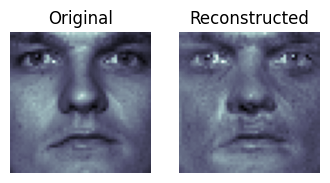

In [93]:

#perform PCA for a very large dimension(200)
X, X_reduced, eigenvectors, labels, X_normalized = manual_pca(200, "Set_1")

#adjust dimension each time for the desired dimension
dimension = 30
eigenvectors30, X_reduced30 = adjust_dim(X_normalized, dimension, eigenvectors)

#train
knn30 = KNeighborsClassifier(n_neighbors=1)
knn30.fit(X_reduced30, labels)

#reconstruct an random image from set1
X_reconstructed = image_reconstruct(eigenvectors30, X_reduced30)

randNum = random.randint(0, 69)

pic_rec = np.array(X_reconstructed[randNum])
pic_old = np.array(X[randNum])

fig, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].imshow(pic_old.reshape(50, 50), cmap='bone')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(pic_rec.reshape(50, 50), cmap='bone')
axes[1].set_title('Reconstructed')
axes[1].axis('off')

plt.show()

#Συγκριση

Παρατηρουμε οτι παρα την μεγαλη μειωση της διαστασης  των εικονων απο 2500 σε 30 μετα προεπεξεργασια και την εφαρμογη pca η ανακατασκευη τυχαιας εικονας μας δειχνει οτι παρα αυτη την μειωση ο αλγοριθμος ειναι ικανος να ανακατασκευασει επιτυχημενα την εικονα ωστε να μοιαζει με την προτοτυπη.Βλεπουμε και με αυτον τον τροπο την ικανοτητα του να επιλεγει επιτυχημενα τα διανυσματα με τις τιμες που εχουν την πιο σημαντικη πληροφορια για την εικονα

##3.3

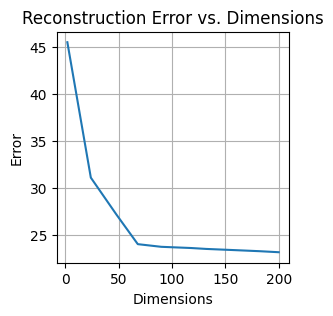

In [94]:

# I chose evenly placed not random
dimensions = [2, 24, 48, 68, 90 , 118, 132, 158, 182, 200]

knn_dict = {}
error = []
for dim in dimensions:

    #adjust vectors to dim dimension
    eigenvectors_dim, X_reduced_dim = adjust_dim(X_normalized, dim, eigenvectors)

    # Train KNN classifier on reduced dimension data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_reduced_dim, labels)
    knn_dict[dim] = knn

    #recostruct for dim
    Xrec_dim = image_reconstruct(eigenvectors_dim, X_reduced_dim)

    #calculate error
    norms = []
    for i in range(70):
        sub_norm = np.linalg.norm(X[i] - Xrec_dim[i])
        norms.append(sub_norm)

    #calculate avg error per dimension
    avg_error = np.mean(norms)
    error.append(avg_error)


#merge and sort (dim, error)
sorted_data = sorted(zip(dimensions, error))
sorted_dim, sorted_error = zip(*sorted_data)

plt.figure(figsize=(3, 3))  # width, height in inches
plt.plot(sorted_dim, sorted_error)
plt.xlabel('Dimensions')
plt.ylabel('Error')
plt.title('Reconstruction Error vs. Dimensions')
plt.grid(True)
plt.show()


#Σχολιασμος


Παρατηρουμε οτι το σφαλμα ανακατασκευης στην αρχη μειωνεται εκθετικα στην συνεχεια λιγο πιο αργα και επειτα τεινει να σταθεροποιηθει λιγο κατω απο το 25 οσο αυξανεται το d (dimension) αλλα δεν μηδενιζεται.Αυτη ειναι μια καλη ενδειξη της αποδοτικοτητας του αλγοριθμου να μειωνει την διασταση των διανυσματων και να τις ανακατασκευαζει χωρις να χανεται σημαντικη πληροφορια για την εικονα αλλα και του οτι δεν εγγυαται την συνεχη μειωση οσο αυξανεται η διασταση σηλαδη οσα vectors και να παιρνουμε θα υπαρχει καποιο loss.

##3.4

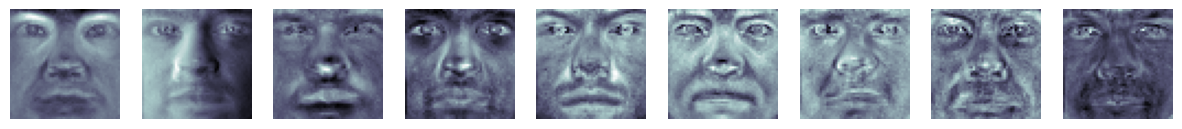

In [95]:
ig, axs = plt.subplots(1, 9, figsize=(15, 1.5))
for i in range(0, 9):
    pic_vec = np.array(eigenvectors[:, i])
    axs[i].imshow(pic_vec.reshape(50, 50), cmap='bone')
    axs[i].axis('off')
plt.show()


#Παρατηρησεις και τι εκφραζουν τα ιδιοδιανυσσματα εκφράζουν τα διαφορετικά ιδιοδιανύσματα


Παραπανω εμφανιζονται τα 9 κυρια eigenvectors  που ειναι τα πρωτα 9 τα ιδιοδιανυσματα με τις μεγαλυτερες ιδιοτιμες δηλαδη τις πιο σημαντικες πληροφοριες για την εικονα.Αυτο φαινεται αλλωστε αφου οπως βλεπουμε με την απεικονηση τους παραπανω δεν δινεται εμφαση στον φωτισμο αλλα στα χαρακτηριστικα του προσωπου οπως μυτη, στομα, ματια  και αλλα σημαντικα για την αναγνωριση των προσωπων ,ακομα και οπτικα, χαρακτηριστικα

##3.5

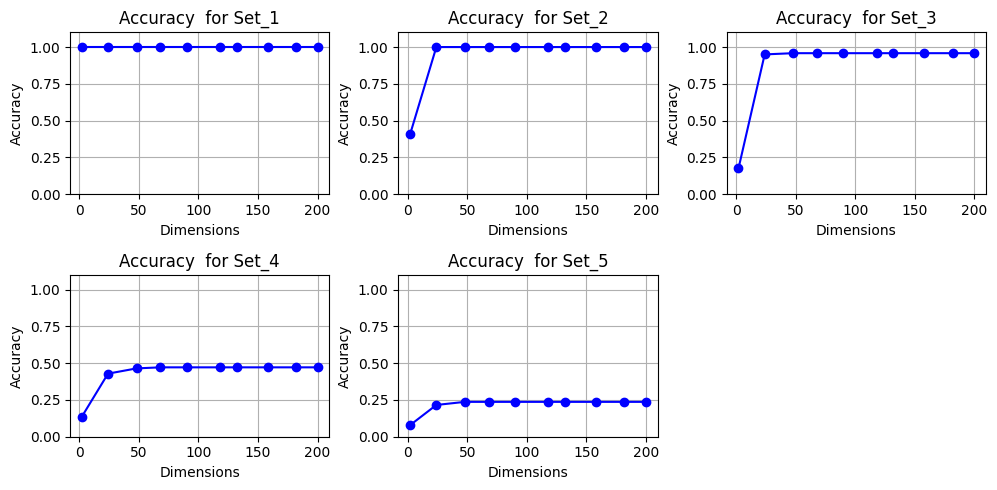

In [96]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))


X_tests = []
all_acc = []
# Loop through each set (Set_1 to Set_5)
for set_number in range(1, 6):
    setName = f"Set_{set_number}"

    # Load images for the current set
    X_test, labels_test = loadImages("/content/drive/MyDrive/ML_DATA/faces/", setName)

    # Calculate accuracies for test data with different dimensions
    accuracies = []
    for dim in dimensions:

        #Reduce dimension of test data
        eigenvectors_test, X_reduced_test = adjust_dim(X_test, dim, eigenvectors)

        #Predict using the trained KNN classifier
        prediction = knn_dict[dim].predict(X_reduced_test)

        #Calculate accuracy
        accuracy = accuracy_score(labels_test, prediction)
        accuracies.append(accuracy)

    X_tests.append(X_test)
    all_acc.append(accuracies)

    if set_number <= 3:
        ax = axs[0, set_number - 1]
    else:
        ax = axs[1, set_number - 4]

    ax.plot(dimensions, accuracies, marker='o', linestyle='-', color='b')
    ax.set_title(f'Accuracy  for {setName}')
    ax.set_xlabel('Dimensions')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0, 1.1)
    ax.grid(True)

fig.delaxes(axs[-1][-1])
plt.tight_layout()
plt.show()


In [97]:
acc_set2 = all_acc[1]
max_acc = max(acc_set2)
ind = acc_set2.index(max_acc)
print("Best accuracy for Set2 at " , ind)

prevMax = -1
for set_acc in all_acc:
  max_acc = max(set_acc)
  ind = set_acc.index(max_acc)
  if ind > prevMax:
    prevMax = ind

print(dimensions[ind])


Best accuracy for Set2 at  1
48


#Για ποιο d έχουμε την καλύτερη απόδοση στο Set_2 και πως η απόδοση αυτή αλλάζει στα υπόλοιπα sets και γιατί


Mε βαση την γραφικη παρασταση και τον παραπανω κωδικα η μεγαλυτερη αποδοση ξεκινα για d = 24 στο 100%  και παραμενει σταθερη για τα επομενα dimensions.Η αποδοση στα υπολοιπα sets ειναι: στο 3 λιγο κατω απο το 1.00 στο 4 αρκετα χαμηλοτερα κατω απο 0.5 και στο 5 κατω απο το 0.25.Βλεπουμε οτι η αποδοση μειωνεται σε μεγαλη κλιμακα στα επομενα σετ , αυτο συμβανει λογω της φωτεινοτητας η οποια μειωνεται στα επομενα σετ και ετσι ειναι αρκετα δυσκολοτερο να γινει και ακριβεστερη προβλεψη των τιμων των διανυσματων και κατεπεκταση του προσωπου.

Ποιο d έχει την σταθερότερη απόδοση στα διαφορετικά sets

το δ = 48 οπως προκυπτει απο τον κωδικα παραπανω

c. Ποιο d θα επιλέγατε για το μοντέλο σας; \\
Θα επελεγα το d αυτο με την σταθεροτερη αποδοση για να εγγυηθω μια ομαλη αποδοση σε ολα τα σετσ αλλα ταυτοχρονα και τη μεγιστη σε καποια σετ, αρα το 48

##3.6

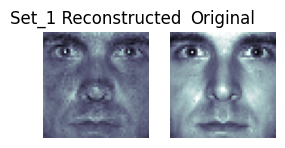

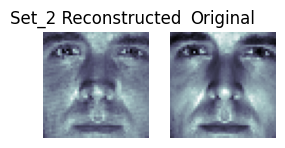

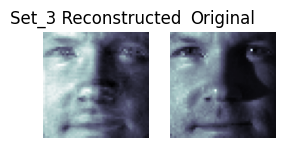

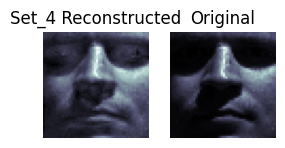

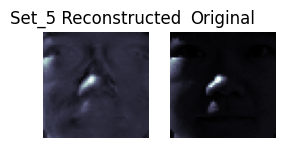

In [98]:
selected_dim = 48

randNum = [
    random.randint(0, 69),
    random.randint(0, 119),
    random.randint(0, 119),
    random.randint(0, 139),
    random.randint(0, 189)
]

for set_number in range(1, 6):
    setName = f"Set_{set_number}"

    Xnew, Xnew_reduced, eigenvectors_new, labels_new, Xnew_norm = manual_pca(selected_dim, setName)

    Xrec_new = image_reconstruct(eigenvectors_new, Xnew_reduced)

    pic_rec = np.array(Xrec_new[randNum[set_number - 1]])
    pic_old = np.array(Xnew[randNum[set_number - 1]])

    fig, axs = plt.subplots(1, 2, figsize = (3, 3))

    axs[0].imshow(pic_rec.reshape(50, 50), cmap='bone')
    axs[0].set_title(setName + ' Reconstructed')
    axs[0].axis('off')

    axs[1].imshow(pic_old.reshape(50, 50), cmap='bone')
    axs[1].set_title('Original')
    axs[1].axis('off')

    plt.show()

Σχολιασμος ποιοτητας ανακατασκευης καθε εικονας

1.Η προτοτυπη εικονα εχει αρκετα καλο φωτισμο αναλογικα σε ολο το προσωπο οποτε η ανακατασκευασμενη εικονα ειναι αρκετα καθαρη και κοντα στην προτοτυπη γεγονος που επιβεβαιωνει και την πολλη καλη αποδοση απο τα διαγραμματα παραπανω \\
2.Φαινεται η διαφορα της ποιοτητας ανακατασκευης απο την πρωτη εικονα καθως δεν ειναι το ιδιο καλη η ανακατασκευη και υπαρχει διαφορα στην ποιοτητα απο την προτοτυπη \\
3.Βλεπουμε οτι στην προτοτυπη εικονα το δεξι μερος το προσωπου δεν ειναι καλα φωτισμενο , παρατηρωντας και την ανακατασκευασμενη παρατηρουμε την επηροη που εχει αυτο στην ποιοτητα ανακατασκευης καθως διαφερει απο το αλλο μισο το οποιο φωτιζεται καλα \\
4.Παρομοια με την παραπανω στα σημεια που ειν αι πιο σκοτεινα η ποιοτητα ανακατασκευης ειναι χειροτερη \\
5.Πλεον στη 5η εικονα ειναι εμφανης η σημασια του φωτισμου καθως σαν προτοτυπη ειναι αρκετα σκοτεινει και φαινεται ποσο δυσκολη ειναι η ανακατασκευη και η προβλεωη του προσωπου \\

Οπως βλεπουμε οι εικονες επιβεβαιωνουν τα διαγραμματα αποδοσης

##3.7

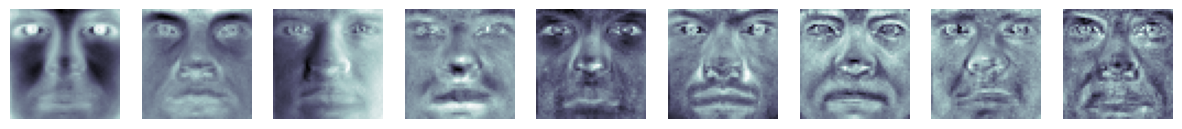

In [99]:
path = "/content/drive/MyDrive/ML_DATA/faces/"

X_svd, labels_svd = loadImages(path, "Set_1")

# perform SVD
U, S, V_T = svd(X_svd, full_matrices=False)
S = np.diag(S)
r = 9

im_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]

ig, axs = plt.subplots(1, 9, figsize=(15, 1.5))
for i in range(0, 9):
    pic_vec = np.array(V_T[i, :])
    axs[i].imshow(pic_vec.reshape(50, 50), cmap='bone')
    axs[i].axis('off')
plt.show()




Διαφορα singular vectors από τα
αντίστοιχα ιδιοδιανύσματα και γιατι

Αν παρατηρησουμε τις εικονες που ,μας δινουν  οι δυο μεθοδοι βλεπουμε οτι ειναι πολυ παρομοιες υπαρχουν ομως διαφορες στον φωτισμο.Σε καποια ο PCA παραγει πιο φωτεινες και στα αντιστοιχα σημεια ο SVD πιο σκοτεινεις και αντιστροφα,αυτο συμβαινει λογω του τροπου με τον οποιο υλοποιειται ο καθενας